In [1]:
# effect of increasing layers


from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from numpy import mean
from numpy import std
from matplotlib import pyplot
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)
	
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


In [5]:
scores, histories = list(), list()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
estp = EarlyStopping(monitor='val_loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(train_norm, trainY, epochs=20, batch_size=16, validation_split=0.1,shuffle='True',verbose=2, callbacks=[estp])
_, acc = model.evaluate(testX, testY, verbose=0)
print(' ')
print('> %.3f' % (acc * 100.0))
scores.append(acc)
histories.append(history)

Epoch 1/20
3375/3375 - 8s - loss: 0.1866 - accuracy: 0.9439 - val_loss: 0.0851 - val_accuracy: 0.9760
Epoch 2/20
3375/3375 - 8s - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0568 - val_accuracy: 0.9843
Epoch 3/20
3375/3375 - 8s - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0471 - val_accuracy: 0.9883
Epoch 4/20
3375/3375 - 9s - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.0403 - val_accuracy: 0.9892
Epoch 5/20
3375/3375 - 8s - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 6/20
3375/3375 - 9s - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0470 - val_accuracy: 0.9882
Epoch 7/20
3375/3375 - 9s - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0446 - val_accuracy: 0.9890
Epoch 8/20
3375/3375 - 8s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 9/20
Restoring model weights from the end of the best epoch.
3375/3375 - 8s - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0431 - val_accuracy: 0.9907
Epoch 00009: early stoppin

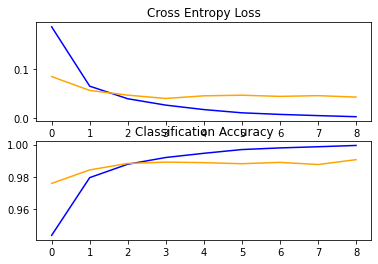

In [6]:
for i in range(len(histories)):
		# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(histories[i].history['loss'], color='blue', label='train')
	pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(2, 1, 2)
	pyplot.title('Classification Accuracy')
	pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
	pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()